In [1]:
import graph_handling as gh
import centralities
from pprint import pprint

import random
import networkx as nx
import numpy as np
import math
import centralities

<h1>Random Graph Creation</h1>

In this brief work we will try to apply some of the results obtained in the article "*Inverse M-Matrix Inequalities and Generalized Ultrametric Matrices*" (J.J.McDonald, M.Neumann, H.Schneider, M.J.Tsatsomeros, 1995) hold for random graphs that we are going to automatically create using Networkx.<br>
In particular, at each iteration we will deal with two graphs that have a random number of nodes but just differ for a single edge: the first graph is made of a strongly connected component and a single node connected to a clique of random size; the other graph is equal to the first one, but we link the first component to the single node.

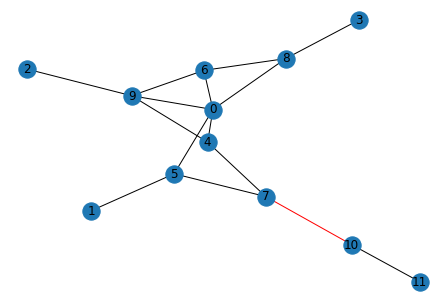

In [3]:
n, a = 10, 0.85
g, ng = gh.random_graphs(n)
x, y = random.sample(g.nodes, k=1)[0], max(g.nodes)+1
k, starting_node = 1, y

g.add_node(y)
ng = g.copy(y)
ng.add_edge(x, y)
g = gh.add_clique(g, k, y)
ng = gh.add_clique(ng, k, y)
gh.show(g, x, y)
    
n = len(g.nodes)

<h1>PageRank Matrix and Symmetrized PageRank Matrix</h1>
$\;A\;$ and $\;A'\;$ are the adjacency matrix of the graph before and adding the edge.<br>
$\;\overline{A}\;$ and $\;\overline{A'}\;$ are the normalized ones, while $\;\alpha\;$ is the damping factor.<br>
$B=(1-\alpha\overline{A})\;$ and $\;B'=(1-\alpha\overline{A'})\;$ are the PageRank matrices.<br>
$\;\tfrac{1}{\alpha}\Delta\;$ and $\;\tfrac{1}{\alpha}\Delta'\;$ are the diagonal matrices, such that $\;\frac{1}{\alpha}\Delta B\;$ and $\;\tfrac{1}{\alpha}\Delta'B'\;$ are symmetric.<br>
In particular, $\;\tfrac{1}{\alpha}\Delta=diag\left(\tfrac{d_{0}}{\alpha},\dots,\tfrac{d_{n-1}}{\alpha}\right),\;$ with $\;d_{i}\;$ being the degree of node $i$. The same holds for $\;\tfrac{1}{\alpha}\Delta'.\;$

In [4]:
A, A_norm = gh.adj_mat(g, False), gh.adj_mat(g, True)
new_A, new_A_norm = gh.adj_mat(ng, False), gh.adj_mat(ng, True)

B = np.identity(n) - a*A_norm
new_B = np.identity(n) - a*new_A_norm

D = np.diag([(A[d]>0).sum()/a for d in range(len(A))])
new_D = np.diag([(new_A[d]>0).sum()/a for d in range(len(new_A))])

for matrix in [B, new_B, D, new_D]:
    try:
        np.linalg.inv(matrix)
    except:
        print('singular matrix')

if not np.isclose(np.dot(D, B),(np.dot(D, B)).T, rtol=1e-10).any() or not np.isclose(np.dot(new_D, new_B),(np.dot(new_D, new_B)).T, rtol=1e-10).any():
    print('error')

We have just proved that $\;\Delta B\;$ and $\;\Delta'B'\;$ are **symmetric**.

In [5]:
if not np.isclose(np.dot(D, B), D - A, rtol=1e-10).any() or not np.isclose(np.dot(new_D, new_B), new_D - new_A, rtol=1e-10).any():
    print('error')

We have also proved that $\;\;\tfrac{1}{\alpha}\Delta B=\tfrac{1}{\alpha}\Delta-A\;\;$ and $\;\;\tfrac{1}{\alpha}\Delta'B'=\tfrac{1}{\alpha}\Delta'-A'.$

<h1>Row Diagonally Dominance</h1>

Now we want to gain information about $\;M^{-1}=(\frac{1}{\alpha}\Delta B)^{-1}.\;$ and $\;M'^{-1}.\;$ Being symmetric inverse M-matrices, we have a lot of properties to look at: first we check if $\;M\;$ and $\;M'\;$ are **strictly row diagonally dominant**.

In [6]:
M, new_M = np.dot(D, B), np.dot(new_D, new_B)
inv_M, new_inv_M = np.linalg.inv(np.dot(D, B)), np.linalg.inv(np.dot(new_D, new_B))

row_sum = np.sum(M, axis=1)
new_row_sum = np.sum(new_M, axis=1)

for i in range(len(row_sum)):
    if not abs(M[i][i]) > abs(row_sum[i]) - abs(M[i][i]):
        print('M is not strictly row diagonally dominant')
for i in range(len(new_row_sum)):
    if not abs(new_M[i][i]) > abs(row_sum[i]) - abs(new_M[i][i]):
        print('new M is not row diagonally dominant')

We have just shown that $\;m_{ii}>\sum_{j=1, i\neq j}^{j=n} m_{ij}.\;$ The same holds for $\;M'.\;$ This means that both are strictly row (and column) diagonally dominant.

In [7]:
for i in range(np.shape(inv_M)[1]):
    for j in range(np.shape(inv_M)[0]):
        if i!=j and inv_M[i][i] <  inv_M[j][i]:
            print('one element of M diagonal is less than one element that is not in the diagonal')
            break
        elif i!=j and inv_M[i][i] == inv_M[j][i]:
            print('one element of M diagonal is equal to one element that is not in the diagonal')
            break

for i in range(np.shape(new_inv_M)[1]):
    for j in range(np.shape(new_inv_M)[0]):
        if i!=j and new_inv_M[i][i] <  new_inv_M[j][i]:
            print('one element of new M diagonal is less than one element that is not in the diagonal')
            break
        elif i!=j and new_inv_M[i][i] == new_inv_M[j][i]:
            print('one element of new M diagonal is equal to one element that is not in the diagonal')
            break

Here we compared the diagonal of $\;M^{-1}\;$ with element in the same row (and column, but the matrix is symmetric) and looked that $\;\;m^{-1}_{ii}>m^{-1}_{ij}>m^{-1}_{ji}\;\;\forall\;\;j\neq i.\;$ The same holds for $\;M'^{-1}.\;$<br><br>

This follows from the **3.2 theorem** and **3.3 remark**.

In [8]:
if (np.diag(new_inv_M) >= np.diag(inv_M)).any():
    print('diagonal of new inverse of M is greater than diagonal of inverse of M')

Here, instead, we showed that $\;m'^{-1}_{ii}<m^{-1}_{ii}\;\;\forall\;i=1,\dots,n.\;$ This means that the **new diagonal is strictly less than the old one**.

In [9]:
for j in range(inv_M.shape[0]):
    for k in range(inv_M.shape[0]):
        for i in range(inv_M.shape[0]):
            if i!=j and i!=k and j!=k:
                if gh.access_to(g, j, k, i) and not (np.round(inv_M[j][k], 10) > np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                    print('j has access to k in g without passing through i but strict inequality does not hold')
                    stop = 0
                    break
                elif not(gh.access_to(g, j, k, i)) and not (np.round(inv_M[j][k], 10) == np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                    print('j has not access to k in gwithout passing through i but equation does not hold')
                    stop = 0
                    break
                elif (np.round(inv_M[j][k], 10) < np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                    print('inequality does not hold at all')
                    stop = 0
                    break

for j in range(new_inv_M.shape[0]):
    for k in range(new_inv_M.shape[0]):
        for i in range(new_inv_M.shape[0]):
            if i!=j and i!=k and j!=k:
                if gh.access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k], 10) > np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                    print('j has access to k without passing through i in ng but strict inequality does not hold')
                    stop = 0
                    break
                elif not(gh.access_to(ng, j, k, i)) and not (np.round(new_inv_M[j][k], 10) == np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                    print('j has not access to k without passing through i in ng but equation does not hold')
                    stop = 0
                    break
                elif (np.round(new_inv_M[j][k], 10) < np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                    print('inequality does not hold at all')
                    stop = 0
                    break

This last step shows that for all distinct $i$, $j$, $k$, it holds that $\;m^{-1}_{jk}\geq \tfrac{m^{-1}_{ji}m^{-1}_{ik}}{m^{-1}_{ii}},\;$ with strict inequality if $j$ has access to $k$ without passing through $i$. Of course, it also holds for $\;M'^{-1}.$<br><br>

This follows from **3.9 theorem**.

In [10]:
for j in range(inv_M.shape[0]):
    for k in range(inv_M.shape[0]):
        for i in range(inv_M.shape[0]):
            if i!=j and i!=k and j!=k:
                if inv_M[i][i] == inv_M[j][i]:
                    if gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) == np.round(inv_M[i][k])):
                        print('j has access to k in g without passing through i but equality does not hold')
                    if not gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) > np.round(inv_M[i][k])):
                        print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                    else:
                        print('something is not working')
                elif inv_M[i][i] == inv_M[i][k]:
                    if gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) == np.round(inv_M[j][i])):
                        print('j has access to k in g without passing through i but equality does not hold')
                    if not gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) > np.round(inv_M[j][i])):
                        print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                    else:
                        print('something is not working')                    
                    
for j in range(new_inv_M.shape[0]):
    for k in range(new_inv_M.shape[0]):
        for i in range(new_inv_M.shape[0]):
            if i!=j and i!=k and j!=k:
                if new_inv_M[i][i] == new_inv_M[j][i]:
                    if gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) == np.round(new_inv_M[i][k])):
                        print('j has access to k in g without passing through i but equality does not hold')
                    if not gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) > np.round(new_inv_M[i][k])):
                        print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                    else:
                        print('something is not working')
                elif new_inv_M[i][i] == new_inv_M[i][k]:
                    if gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) == np.round(new_inv_M[j][i])):
                        print('j has access to k in g without passing through i but equality does not hold')
                    if not gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) > np.round(new_inv_M[j][i])):
                        print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                    else:
                        print('something is not working')  

Here we showed that for all distinct $i$, $j$, $k$, it holds that if $\;m^{-1}_{ii}=m^{-1}_{ji}\;$ then $\;m^{-1}_{jk}\geq m^{-1}_{ik},\;$ with strict inequality if $j$ has access to $k$ without passing through $i$.<br>
Instead, if $\;m^{-1}_{ii}=m^{-1}_{ik},\;$ then $\;m^{-1}_{jk}=m^{-1}_{ji},\;$ with strict inequality if $j$ has access to $k$ without passing through $i$. Of course, it also holds for $\;M'^{-1}.$<br><br>

This follows from **3.10 corollary**.

<h1>Suming up</h1><br>
In the following step we sum up everything, creating random graphs and looking if all of them satisfy the properties we have just presented.

In [13]:
stop = 0
iterations = 0

while(stop and iterations<1000):  
    
    n, a = np.random.randint(3, 10), 0.85
    g, ng = gh.random_graphs(n)
    x, y = random.sample(g.nodes, k=1)[0], max(g.nodes)+1
    starting_node = y
    k = np.random.randint(1,3)
    # k = 1
    g.add_node(y)
    ng = g.copy(y)
    ng.add_edge(x, y)
    # gh.show(g, x, y)
    g = gh.add_clique(g, k, y)
    ng = gh.add_clique(ng, k, y)
    # gh.show(g, x, y)
    
    if nx.is_connected(g) or not nx.is_connected(ng):
        print('graph creation error')
    
    n = len(g.nodes)

    A, A_norm = gh.adj_mat(g, False), gh.adj_mat(g, True)
    new_A, new_A_norm = gh.adj_mat(ng, False), gh.adj_mat(ng, True)

    B = np.identity(n) - a*A_norm
    new_B = np.identity(n) - a*new_A_norm

    D = np.diag([(A[d]>0).sum()/a for d in range(len(A))])
    new_D = np.diag([(new_A[d]>0).sum()/a for d in range(len(new_A))])

    M, new_M = np.dot(D, B), np.dot(new_D, new_B)
    inv_M, new_inv_M = np.linalg.inv(np.dot(D, B)), np.linalg.inv(np.dot(new_D, new_B))

    row_sum = np.sum(M, axis=1)
    new_row_sum = np.sum(new_M, axis=1)
    
    for i in range(len(row_sum)):
        if not abs(M[i][i]) > abs(row_sum[i]) - abs(M[i][i]):
            print('M is not strictly row diagonally dominant')
            stop = 0
    for i in range(len(new_row_sum)):
        if not abs(new_M[i][i]) > abs(row_sum[i]) - abs(new_M[i][i]):
            print('new M is not row diagonally dominant')
            stop = 0
            
    for i in range(np.shape(inv_M)[1]):
        for j in range(np.shape(inv_M)[0]):
            if i!=j and inv_M[i][i] <  inv_M[j][i]:
                print('one element of M diagonal is less than one element that is not in the diagonal')
                stop = 0
            elif i!=j and inv_M[i][i] == inv_M[j][i]:
                print('one element of M diagonal is equal to one element that is not in the diagonal')
                stop = 0

    for i in range(np.shape(new_inv_M)[1]):
        for j in range(np.shape(new_inv_M)[0]):
            if i!=j and new_inv_M[i][i] <  new_inv_M[j][i]:
                print('one element of new M diagonal is less than one element that is not in the diagonal')
                stop = 0
            elif i!=j and new_inv_M[i][i] == new_inv_M[j][i]:
                print('one element of new M diagonal is equal to one element that is not in the diagonal')
                stop = 0
                                
    if (np.diag(new_inv_M) >= np.diag(inv_M)).any():
        print('diagonal of new inverse of M is greater than diagonal of inverse of M') 
        stop = 0
    
    for j in range(inv_M.shape[0]):
        for k in range(inv_M.shape[0]):
            for i in range(inv_M.shape[0]):
                if i!=j and i!=k and j!=k:
                    if gh.access_to(g, j, k, i) and not (np.round(inv_M[j][k], 10) > np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                        print('j has access to k without passing through i but strict inequality does not hold')
                        stop = 0
                        break
                    elif not(gh.access_to(g, j, k, i)) and not (np.round(inv_M[j][k], 10) == np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                        print('j has not access to k without passing through i but equation does not hold')
                        stop = 0
                        break
                    elif (np.round(inv_M[j][k], 10) < np.round((inv_M[j][i] * inv_M[i][k]) / inv_M[i][i], 10)):
                        print('inequality does not hold at all')
                        stop = 0
                        break

    for j in range(new_inv_M.shape[0]):
        for k in range(new_inv_M.shape[0]):
            for i in range(new_inv_M.shape[0]):
                if i!=j and i!=k and j!=k:
                    if gh.access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k], 10) > np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                        print('j has access to k without passing through i but strict inequality does not hold')
                        stop = 0
                        break
                    elif not(gh.access_to(ng, j, k, i)) and not (np.round(new_inv_M[j][k], 10) == np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                        print('j has not access to k without passing through i but equation does not hold')
                        stop = 0
                        break
                    elif (np.round(new_inv_M[j][k], 10) < np.round((new_inv_M[j][i] * new_inv_M[i][k]) / new_inv_M[i][i], 10)):
                        print('inequality does not hold at all')
                        stop = 0
                        break

    for j in range(inv_M.shape[0]):
        for k in range(inv_M.shape[0]):
            for i in range(inv_M.shape[0]):
                if i!=j and i!=k and j!=k:
                    if inv_M[i][i] == inv_M[j][i]:
                        if gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) == np.round(inv_M[i][k])):
                            print('j has access to k in g without passing through i but equality does not hold')
                            stop = 0
                            break
                        if not gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) > np.round(inv_M[i][k])):
                            print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                            stop = 0
                            break
                        else:
                            print('something is not working')
                            stop = 0
                            break
                    elif inv_M[i][i] == inv_M[i][k]:
                        if gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) == np.round(inv_M[j][i])):
                            print('j has access to k in g without passing through i but equality does not hold')
                            stop = 0
                            break                        
                        if not gh.has_access_to(g, j, k, i) and not (np.round(inv_M[j][k]) > np.round(inv_M[j][i])):
                            print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                            stop = 0
                            break                        
                        else:
                            print('something is not working')
                            stop = 0
                            break
                    
    for j in range(new_inv_M.shape[0]):
        for k in range(new_inv_M.shape[0]):
            for i in range(new_inv_M.shape[0]):
                if i!=j and i!=k and j!=k:
                    if new_inv_M[i][i] == new_inv_M[j][i]:
                        if gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) == np.round(new_inv_M[i][k])):
                            print('j has access to k in g without passing through i but equality does not hold')
                            stop = 0
                            break                        
                        if not gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) > np.round(new_inv_M[i][k])):
                            print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                            stop = 0
                            break                        
                        else:
                            print('something is not working')
                            stop = 0
                            break                    
                    elif new_inv_M[i][i] == new_inv_M[i][k]:
                        if gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) == np.round(new_inv_M[j][i])):
                            print('j has access to k in g without passing through i but equality does not hold')
                            stop = 0
                            break                        
                        if not gh.has_access_to(ng, j, k, i) and not (np.round(new_inv_M[j][k]) > np.round(new_inv_M[j][i])):
                            print('j does not have acces to k in g without passing through i but strict inequality does not hold')
                            stop = 0
                            break                        
                        else:
                            print('something is not working')
                            stop = 0
                            break
    
    iterations += 1

# print(iterations)
                    